<a href="https://colab.research.google.com/github/yuanfeiwo/test-firstrepository/blob/master/Copy_of_2_1Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Module: Exploratory data analysis of the  Credit risk case study
# Version 2.0
# Topic : Exploring Data sets to make sense in Python
# Example source: https://www.kaggle.com/wendykan/lending-club-loan-data
#####################################################################
# Copyright 2020 QuantUniversity LLC.
#####################################################################

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 43.7MB 1.1MB/s
     |████████████████████████████████| 81kB 3.6MB/s 
     |████████████████████████████████| 604kB 8.2MB/s 
     |████████████████████████████████| 3.1MB 14.3MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
     |████████████████████████████████| 296kB 30.9MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.10.0-py2.py3-none-any.whl size=232425 sha256=9b026143d695d347e25728660a38424a5c63584db56d3750b31173028ca2b9aa
  Stored in directory: /tmp/pip-ephem-wheel-cache-osilod7i/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27085 sha256=a2fe9248719489e0f7fd94001889c10a25bf8aa3587779b9ece5c76656d38a44
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
Successfully built pandas-profiling htmlmin
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully unin

#  Exploring Data sets to make sense in Python

This notebook deals with understanding the lending data obtained from https://www.kaggle.com/wendykan/lending-club-loan-data

## Imports

In [ ]:
# for numerical analysis and data processing
import numpy as np
import pandas as pd
import itertools

# for Machine learning algorithms
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

# for vizualizations
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

## Dataset

The data set is the lending data obtained from LendingClub from August 2011 to December 2011 for some borrowers. The feature descriptions for the data are also provided. Not all the features are required for making predictions, some features are redundant in the original data file. The provided data file is already cleaned and only relevant features are provided. There are two types of features, numerical and categorical.

Reading the input data from csv file.

In [ ]:
df = pd.read_csv("https://mlinfinance.s3-us-west-2.amazonaws.com/Module2-ExploratoryDataAnalysis/LendingClubLoan.csv", low_memory=False)
df_description = pd.read_excel('https://mlinfinance.s3-us-west-2.amazonaws.com/Module2-ExploratoryDataAnalysis/LCDataDictionary.xlsx').dropna()
df_description.head(10)

LoanStatNew                                        Description
0        acc_now_delinq  The number of accounts on which the borrower i...
1  acc_open_past_24mths         Number of trades opened in past 24 months.
2            addr_state  The state provided by the borrower in the loan...
3              all_util              Balance to credit limit on all trades
4            annual_inc  The self-reported annual income provided by th...
5      annual_inc_joint  The combined self-reported annual income provi...
6      application_type  Indicates whether the loan is an individual ap...
7           avg_cur_bal            Average current balance of all accounts
8        bc_open_to_buy          Total open to buy on revolving bankcards.
9               bc_util  Ratio of total current balance to high credit/...

### Check shape of dataframe and columns types
Categorical features are represented as _object_ type. This dataset has 9999 samples with 17 features.

In [ ]:
print(df.shape)
df.head()

(9999, 17)


loan_amnt        term  ...  inq_last_6mths  loan_status_Binary
0       5000   36 months  ...               1                   0
1       2500   60 months  ...               5                   1
2       2400   36 months  ...               2                   0
3      10000   36 months  ...               1                   0
4       3000   60 months  ...               0                   0

[5 rows x 17 columns]

In [ ]:
del df['issue_d'] # removing issue date as it wont affect the prediction (redundant feature)

## Distribution of data types in features
This data set have equal number of catgorical and numerical features.

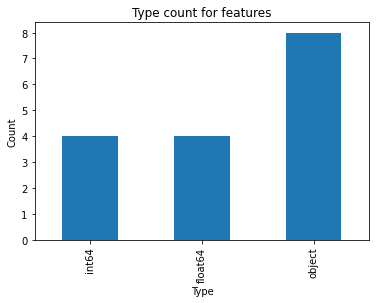

In [ ]:
plt.title('Type count for features')
plt.xlabel('Type')
plt.ylabel('Count')
df.dtypes.value_counts().sort_values().plot(kind='bar')
plt.show()

## Numerical data

### Correlation matrix for numerical data


We can calculate the corelation matrix for the given numerical features to see the relation or dependency of features among themselves. Each cell in the matrix describes the Pearson Correlation coefficient, a value between -1 and 1. A correlation coefficient indicates the extent to which dots in a scatterplot lie on a straight line. This implies that we can usually estimate correlations pretty accurately from nothing more than scatterplots. +1 is highly linearly related and -1 is highly negatively linearly related. A fractional number indicates deviation from a linear trend. 

['loan_amnt' 'int_rate' 'installment' 'annual_inc' 'dti' 'delinq_2yrs'
 'inq_last_6mths' 'loan_status_Binary']


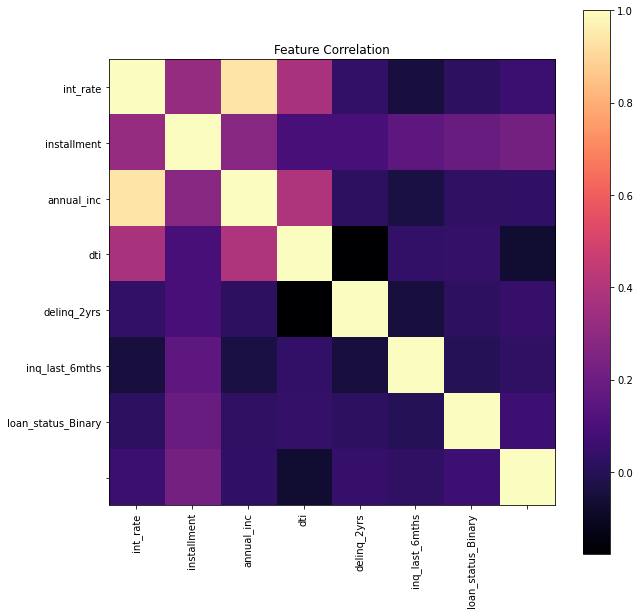

In [ ]:
def correlation_matrix(df):
    fig = plt.figure(figsize = (10,10))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('magma')
    corr = df.corr()
    cax = ax1.imshow(corr, interpolation="nearest", cmap=cmap)
    plt.title('Feature Correlation')
    labels = df.columns.values
    print(labels)
    ax1.set_xticklabels(corr.columns,fontsize=10, rotation=90)
    ax1.set_yticklabels(corr.columns,fontsize=10)
    fig.colorbar(cax)
    plt.show()

correlation_matrix(df.select_dtypes(include=['float64','int64']))

For the given dataset, it is evident fom the correlation matrix that the _installment_ is somewhat related to all other numerical features. Also, _interst rate_, _annual income_ and _dti_ have some sort of linear relationship.

## Categorical Features

### Preparing categorical features

Categorical data is best processed by algorithms when converted to numerical format.An intuitive way would be to map each category to an integers. Ex. \[A, B, C\] can be mapped to \[0, 1, 2\]. Another way is one-hot encoding which we will look into while building the models.

Get a list of all numerical and categorical features

In [ ]:
numeric_columns = df.select_dtypes(include=['float64','int64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

In [ ]:
print(numeric_columns)
print(categorical_columns)

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'loan_status_Binary'],
      dtype='object')
Index(['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'verification_status', 'purpose', 'addr_state'],
      dtype='object')


Change type from object to category

In [ ]:
for col in categorical_columns:
    df[col] = df[col].astype('category')

In [ ]:
p_categories = df['purpose'].cat.categories.tolist()
s_categories = df['addr_state'].cat.categories.tolist()
print(dict( enumerate(df['purpose'].cat.categories) ))

df[categorical_columns] = df[categorical_columns].apply(lambda x: x.cat.codes)

{0: 'car', 1: 'credit_card', 2: 'debt_consolidation', 3: 'home_improvement', 4: 'house', 5: 'major_purchase', 6: 'medical', 7: 'moving', 8: 'other', 9: 'renewable_energy', 10: 'small_business', 11: 'vacation', 12: 'wedding'}


## Summary of features

### Summary of categorical features

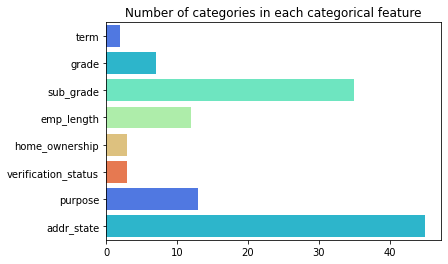

In [ ]:
# Barplot
sns.barplot(y = categorical_columns, x = df[categorical_columns].apply(pd.Series.nunique, axis = 0).tolist(), palette=sns.color_palette("rainbow"))
plt.title('Number of categories in each categorical feature')
plt.show()

### Summary of numerical features

In [ ]:
df.select_dtypes(include=['float64','int64']).describe()

loan_amnt     int_rate  ...  inq_last_6mths  loan_status_Binary
count   9999.000000  9999.000000  ...     9999.000000         9999.000000
mean   12861.456146    12.428641  ...        0.849685            0.155616
std     8492.219046     4.239319  ...        1.040444            0.362509
min     1000.000000     5.420000  ...        0.000000            0.000000
25%     6000.000000     8.900000  ...        0.000000            0.000000
50%    11200.000000    12.420000  ...        1.000000            0.000000
75%    17500.000000    15.270000  ...        1.000000            0.000000
max    35000.000000    24.110000  ...        8.000000            1.000000

[8 rows x 8 columns]

### Summary of loan amounts

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


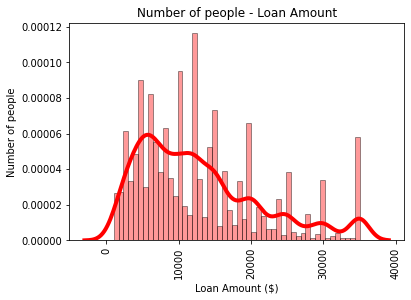

count     9999.000000
mean     12861.456146
std       8492.219046
min       1000.000000
25%       6000.000000
50%      11200.000000
75%      17500.000000
max      35000.000000
Name: loan_amnt, dtype: float64


In [ ]:
# Histogram and density chart
sns.distplot(df['loan_amnt'], hist=True, kde=True, 
             bins=50, color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xticks(rotation=90)
plt.title('Number of people - Loan Amount')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Number of people')
plt.show()

print(df['loan_amnt'].describe())

### Summary of Annual incomes

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


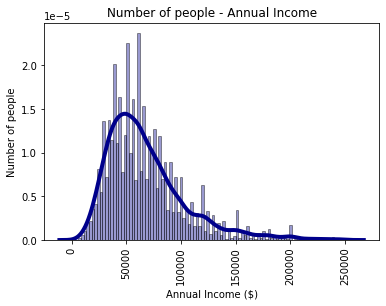

count    9.999000e+03
mean     7.027073e+04
std      4.832171e+04
min      6.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.450000e+04
max      1.782000e+06
Name: annual_inc, dtype: float64


In [ ]:
# Histogram and density chart
sns.distplot(df[df['annual_inc'] <250000]['annual_inc'], hist=True, kde=True, 
             bins=100, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.xticks(rotation=90)
plt.title('Number of people - Annual Income')
plt.xlabel('Annual Income ($)')
plt.ylabel('Number of people')
plt.show()

print(df['annual_inc'].describe())

### Loan Purposes distribution
By looking at the distribution, it can be seen that debt consolidation is one of the major resons for loan. In the given dataset, the number of samples having debt consolidation as the purpose are significantly more than other  purposes.

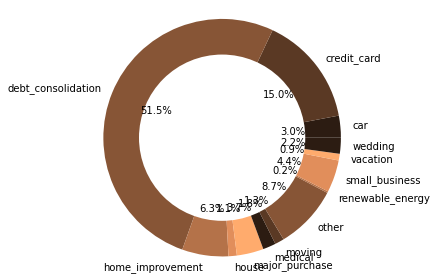

count    9999.000000
mean        3.303230
std         2.923144
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        12.000000
Name: purpose, dtype: float64


In [ ]:
# Circle chart
fig1, ax1 = plt.subplots()
ax1.pie(df['purpose'].value_counts().sort_index().tolist(),
        labels=p_categories,
        autopct='%1.1f%%',
        colors= sns.color_palette("copper"))

ax1.axis('equal')

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
  
plt.tight_layout()
plt.show()


# Summary
print(df['purpose'].describe())

### State wise customer distribution
The states of Californial has the highest number of borrowers followed by New York and Florida.

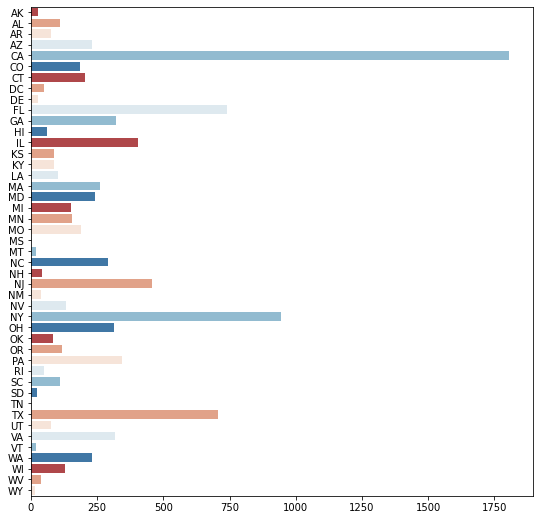

count    9999.000000
mean       18.993199
std        12.703174
min         0.000000
25%         6.000000
50%        17.000000
75%        29.000000
max        44.000000
Name: addr_state, dtype: float64


In [ ]:
# Bar chart
fig, ax = plt.subplots(figsize=(9,9))
sns.barplot(x=df['addr_state'].value_counts().sort_index().tolist(), y = s_categories, palette=sns.color_palette("RdBu"))
plt.show()

#Summary
print(df['addr_state'].describe())

## Dataset Overview

In [ ]:
import pandas_profiling as ppf

df = pd.read_csv("https://mlinfinance.s3-us-west-2.amazonaws.com/Module2-ExploratoryDataAnalysis/LendingClubLoan.csv", low_memory=False)
profile = ppf.ProfileReport(df)

In [ ]:
ppf.ProfileReport(df)

# End